<a href="https://colab.research.google.com/github/imad3k/GooglePlayStoreApps/blob/main/Project_Notebook_01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DSBA 6276: Project, Group 5**

*   Joel Reji jreji@uncc.edu
*   Daniel Alvarez Castro dalvare8@uncc.edu
*   Gokula Vijayakumar gvijayak@uncc.edu
*   Imad Ahmad iahmad@uncc.edu

## **Google Play Store Apps**
Web scraped data of 10k Play Store apps for analyzing the Android market.

Web link: https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore_user_reviews.csv

# Load the Data



In [50]:
import pandas as pd

# Set Pandas Options to display max rows
pd.set_option('max_row', None)

import matplotlib.pyplot as plt


In [14]:
# Load the data

# Playstore data
ps_data_url = 'https://raw.githubusercontent.com/imad3k/GooglePlayStoreApps/main/googleplaystore.csv'
ps_df = pd.read_csv(ps_data_url)

# Reviews data
review_data_url = 'https://raw.githubusercontent.com/imad3k/GooglePlayStoreApps/main/googleplaystore_user_reviews.csv'
reviews_df = pd.read_csv(review_data_url)

In [15]:
# Taking a look at the playstore data frame
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [17]:
# Reviews Data
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Merge the two Data Frames

# Exploratory data analysis

In [18]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
ps_df.shape

(10841, 13)

## Number of categories

In [20]:
ps_df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

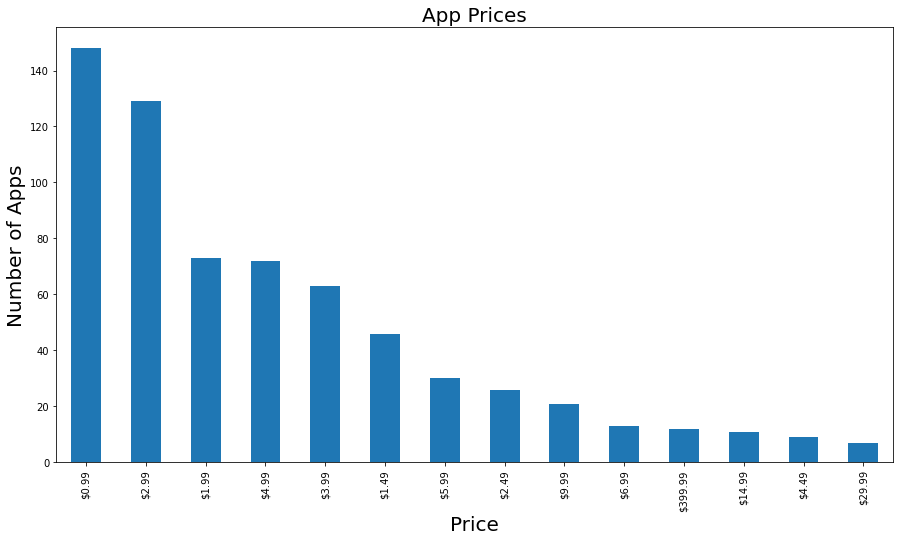

In [56]:
# Market prices (* removed free apps)
ps_df['Price'].value_counts()[1:15].plot(kind='bar', figsize=(15, 8))
plt.title('App Prices', fontsize=20)
plt.xlabel('Price', fontsize=20)
plt.ylabel('Number of Apps', fontsize=20)
plt.show()

In [28]:
# Taking a closer look at Finance Apps

finance_apps = ps_df[ps_df['Category'] == 'FINANCE']
finance_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1048,K PLUS,FINANCE,4.4,124424,Varies with device,"10,000,000+",Free,0,Everyone,Finance,"June 26, 2018",4.6.0,4.2 and up
1049,ING Banking,FINANCE,4.4,39041,Varies with device,"1,000,000+",Free,0,Everyone,Finance,"August 3, 2018",Varies with device,Varies with device
1050,Citibanamex Movil,FINANCE,3.6,52306,42M,"5,000,000+",Free,0,Everyone,Finance,"July 27, 2018",20.1.0,5.0 and up
1051,The postal bank,FINANCE,3.7,36718,Varies with device,"5,000,000+",Free,0,Everyone,Finance,"July 16, 2018",Varies with device,Varies with device
1052,KTB Netbank,FINANCE,3.8,42644,19M,"5,000,000+",Free,0,Everyone,Finance,"June 28, 2018",8.18,4.2 and up


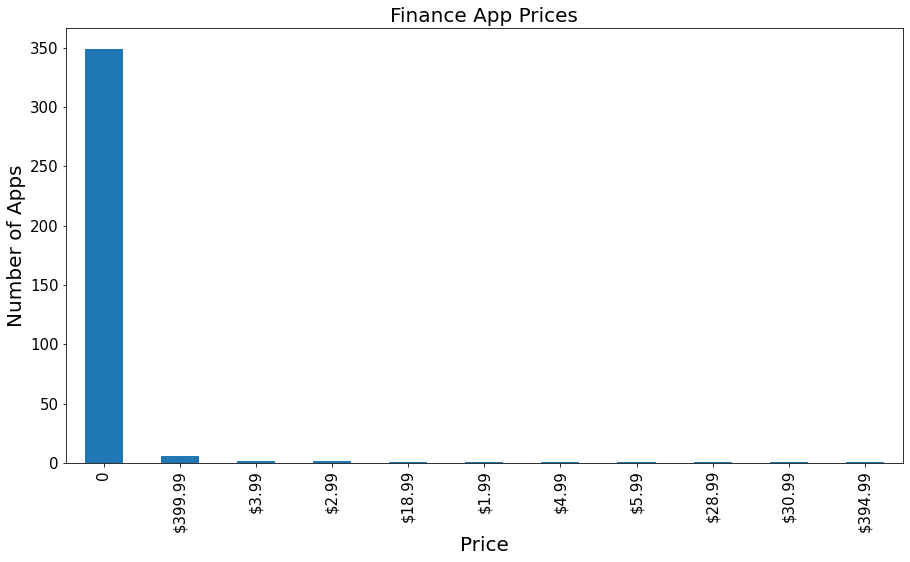

In [59]:
finance_apps['Price'].value_counts().plot(kind='bar', figsize=(15, 8), fontsize=15)
plt.title('Finance App Prices', fontsize=20)
plt.xlabel('Price', fontsize=20)
plt.ylabel('Number of Apps', fontsize=20)
plt.show()

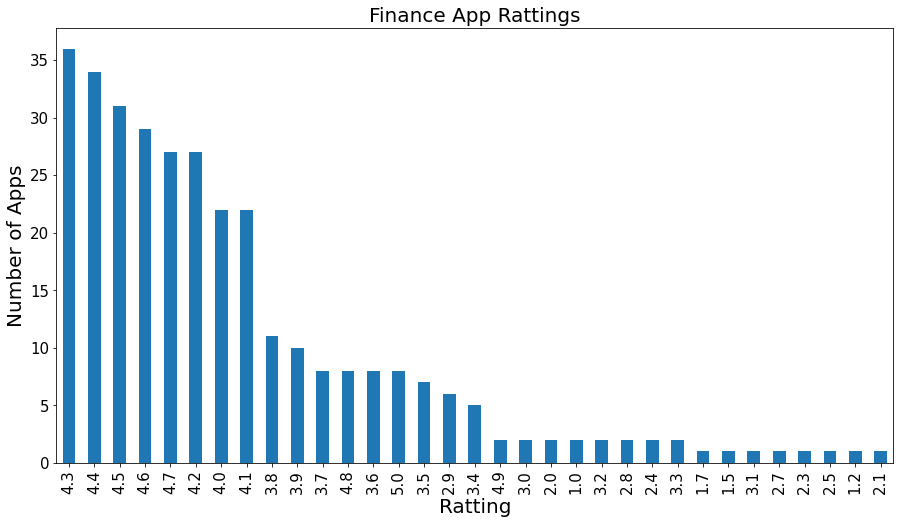

In [61]:
finance_apps['Rating'].value_counts().plot(kind='bar', figsize=(15, 8), fontsize=15)
plt.title('Finance App Rattings', fontsize=20)
plt.xlabel('Ratting', fontsize=20)
plt.ylabel('Number of Apps', fontsize=20)
plt.show()

# EDA on Reviews

In [22]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [23]:
reviews_df.groupby('App')['Sentiment'].value_counts()

App                                                 Sentiment
10 Best Foods for You                               Positive     162
                                                    Neutral       22
                                                    Negative      10
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                    Positive      31
                                                    Neutral        8
                                                    Negative       1
11st                                                Positive      23
                                                    Neutral       10
                                                    Negative       7
1800 Contacts - Lens Store                          Positive      64
                                                    Neutral       10
                                                    Negative       6
1LINE – One Line with One Touch                     Positive      27
                                         